## Linear Regression Formula

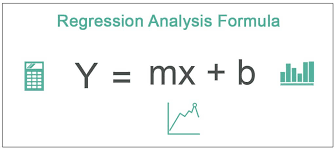

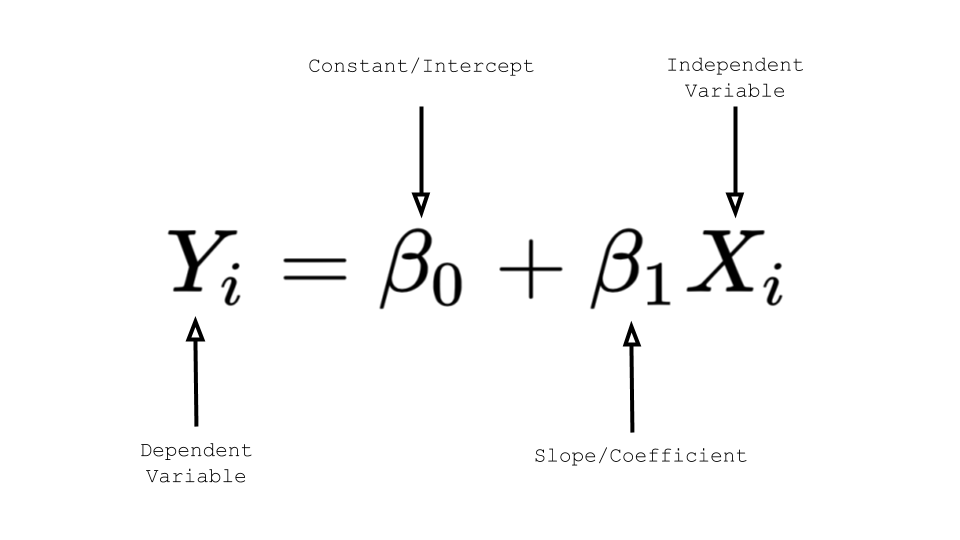

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("insurance.csv")

data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [5]:
from sklearn.preprocessing import LabelEncoder

for name , type_ in data.dtypes.items():
    if str(type_) == 'object':
        Le = LabelEncoder()
        data[name] = Le.fit_transform(data[name])

In [6]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [7]:
X = data.loc[:,'age':'region'].values 

In [8]:
X

array([[19. ,  0. , 27.9,  0. ,  1. ,  3. ],
       [18. ,  1. , 33.8,  1. ,  0. ,  2. ],
       [28. ,  1. , 33. ,  3. ,  0. ,  2. ],
       ...,
       [18. ,  0. , 36.9,  0. ,  0. ,  2. ],
       [21. ,  0. , 25.8,  0. ,  0. ,  3. ],
       [61. ,  0. , 29.1,  0. ,  1. ,  1. ]])

In [9]:
Y = data['expenses'].values

In [10]:
Y

array([16884.92,  1725.55,  4449.46, ...,  1629.83,  2007.95, 29141.36])

In [11]:
from sklearn.model_selection import train_test_split

Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.2 , random_state = 4)

In [12]:
from sklearn.linear_model import Ridge , Lasso , ElasticNet , LinearRegression

In [13]:
model = LinearRegression()
model.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model.score(Xtrain , Ytrain))  ### R square score
print(" Testing Accuracy : " , model.score(Xtest , Ytest))    ## R square score

 Training Accuracy :  0.7605842666582161
 Testing Accuracy :  0.697040486095298


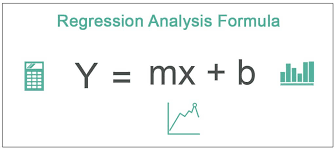

In [14]:
model.intercept_

-11247.864299924553

In [15]:
model.coef_

array([  263.03001216,  -361.94051659,   317.92512595,   400.95214048,
       24571.54088607,  -450.26056358])

In [16]:
age = 32
sex = 1
bmi = 33
children = 3
smoker = 0
region = 2

In [17]:
(263.03001216 * age) + (-361.94051659 * sex) + (317.92512595 * bmi) + (400.95214048 * children) + (24571.54088607 * smoker) + (-450.26056358 * region) + model.intercept_

7601.020023235447

In [18]:
pd.Series(model.predict(Xtest))

0       8154.190836
1      10668.807889
2       5111.187860
3      11605.727853
4       9532.020955
           ...     
263     7342.985335
264    10411.331585
265    10489.676875
266    34812.464351
267     7629.465524
Length: 268, dtype: float64

In [19]:
pd.DataFrame(Xtest)

,0,1,2,3,4,5
0,41.0,1.0,28.4,1.0,0.0,1.0
1,58.0,0.0,25.2,0.0,0.0,3.0
2,26.0,1.0,27.3,3.0,0.0,0.0
3,38.0,0.0,40.6,1.0,0.0,1.0
4,40.0,1.0,32.3,2.0,0.0,1.0
...,...,...,...,...,...,...
263,33.0,0.0,32.9,2.0,0.0,3.0
264,41.0,0.0,33.1,2.0,0.0,1.0
265,48.0,0.0,27.4,1.0,0.0,0.0
266,47.0,0.0,27.6,2.0,1.0,1.0


## Bias
Bias is the difference between the average prediction of our model and the correct value which we are trying to predict. Model with high bias pays very little attention to the training data and oversimplifies the model. It always leads to high error on training and test data.

## Variance
Variance is the variability of model prediction for a given data point or a value which tells us spread of our data. Model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before. As a result, such models perform very well on training data but has high error rates on test data.

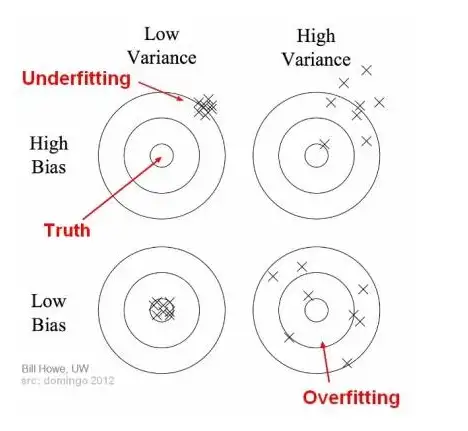

## Underfit Model

We can find a line that captures a general direction but does not capture many of the points. Since it does not capture many of the points well, it has a high bias or high error. Since it does not grasp many of the points in the graph, it also has a low variance. This would be called an underfit model.

## Good Fit Model

We can find a line that captures the general direction of the points but might not capture every point in the graph. This would be a good fit model.

## Overfit Model

Lastly, we can find a line that captures every single point in the graph. This would be called an overfit model.


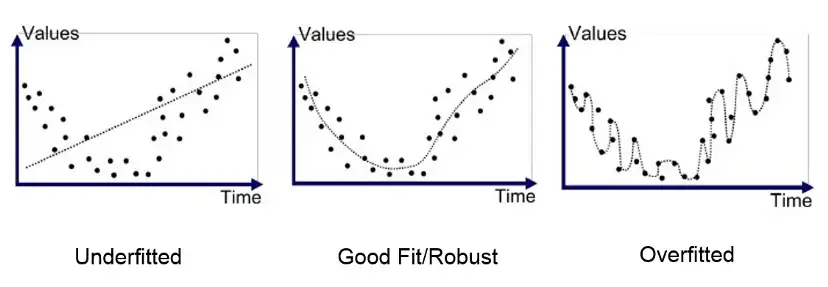


## Reducing Overfit with regularization

Lasso, Ridge, and Elastic Net models are forms of regularized linear techniques found in General Linear Models.

## Lasso / L1 Regularization

Lasso stands for Least Absolute Shrinkage Selector Operator. Lasso assigns a penalty to the coefficients in the linear model using the formula below and eliminates variables with coefficients that zero. This is called shrinkage or the process where data values are shrunk to a central point such as a mean.

Lasso adds a penalty to coefficients the model overemphasizes. This reduces the degree of overfitting that occurs within the model.

Lasso Formula: Lasso = Sum of Error + Sum of the absolute value of coefficients

L = ∑( Ŷi– Yi)² + λ∑ |β|

In [20]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [21]:
model = Lasso()
model.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model.score(Xtest , Ytest))

 Training Accuracy :  0.760584179061482
 Testing Accuracy :  0.6971229299934658


# Ridge / L2 Regularization

As Lasso does, ridge also adds a penalty to coefficients the model overemphasizes. The value of lambda also plays a key role in how much weight you assign to the penalty for the coefficients. The larger your value of lambda, the more likely your coefficients get closer and closer to zero. Unlike lasso, the ridge model will not shrink these coefficients to zero.

Ridge Formula: Sum of Error + Sum of the squares of coefficients

L = ∑( Ŷi– Yi)² + λ∑ β²

In [22]:
model = Ridge()
model.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model.score(Xtest , Ytest))

 Training Accuracy :  0.7605625231189316
 Testing Accuracy :  0.698418311456229


# Elastic Net

Elastic Net combines characteristics of both lasso and ridge. Elastic Net reduces the impact of different features while not eliminating all of the features.

The formula as you can see below is the sum of the lasso and ridge formulas.

Elastic Net Formula: Ridge + Lasso

In [23]:
# Elastic 

# lambda_1*L1 + lambda_2*L2 
# alpha = lambda_1 + lambda_2 , l1_ratio = lambda_1/(lambda_1 + lambda_2)

model = ElasticNet()
model.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model.score(Xtest , Ytest))

 Training Accuracy :  0.3931383373428987
 Testing Accuracy :  0.41259568271408165
